In [1]:
import sys
import json
import re
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import plotly.plotly as py
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from random import sample
from datetime import datetime
from datetime import timezone 

In [2]:
screen_name1 = "CocaCola"
screen_name2 = "pepsi"

# Creation Date of Twitter Account

The Twttr project got the green light by Odeo and by March 2006, a working prototype was available; by July 2006, the Twttr service was released to the public.

The first tweet occurred on March 21, 2006, at 9:50 PM Pacific Standard Time when Jack Dorsey tweeted "just setting up my twttr".

In [14]:
def creationDate(screen_name):
    user_profile = 'output/{}/user_profile.json'.format(screen_name)
    with open(user_profile, mode='r', encoding='utf-8') as f:
        profile = json.load(f)
        creation_date = datetime.strptime(profile['created_at'], '%a %b %d %H:%M:%S %z %Y').strftime('%d-%m-%Y')
        print("The account creation date of {} is on {}.\n".format(screen_name, creation_date))
        creation_date = datetime.strptime(creation_date, '%d-%m-%Y')
    return creation_date
        
creation_date_CocaCola = creationDate(screen_name1)
creation_date_Pepsi = creationDate(screen_name2)

gap=(creation_date_CocaCola-creation_date_Pepsi).days

print("The gap between the Twitter account creation date of CocaCola & Pepsi is {} days. \nPepsi owned a Twitter account earlier than the CocaCola.".format(gap))

The account creation date of CocaCola is on 26-03-2009.

The account creation date of pepsi is on 15-12-2008.

The gap between the Twitter account creation date of CocaCola & Pepsi is 101 days. 
Pepsi owned a Twitter account earlier than the CocaCola.


In [119]:
import plotly.offline as py
import plotly.figure_factory as ff

py.init_notebook_mode(connected=True)

df = [dict(Task="CocaCola", Start=creation_date_CocaCola, Finish='2020'),
      dict(Task="Pepsi", Start=creation_date_Pepsi, Finish='2020')]

colors = ["#FF0000", "#0000FF"]

fig = ff.create_gantt(df[::-1], colors=colors[::-1], bar_width=0.25, showgrid_x=True)
py.iplot(fig)

# Audience Size Growth

Audience Size of CocaCola:
The audience size of CocaCola on 28-12-2019 is 3404147.
The audience size of CocaCola on 29-12-2019 is 3403847.
The audience size of CocaCola on 02-01-2020 is 3403372.
The audience size of CocaCola on 03-01-2020 is 3403268.
The audience size of CocaCola on 04-01-2020 is 3403068.

Audience growth: -155.0


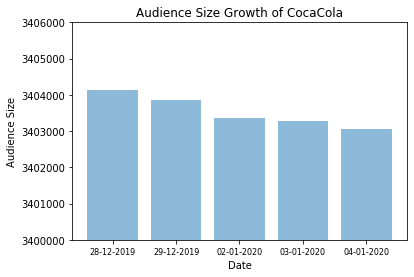

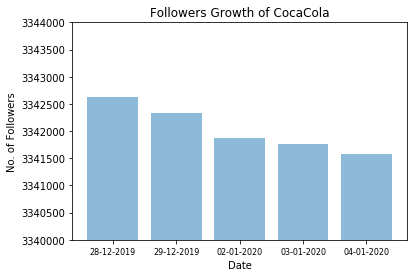

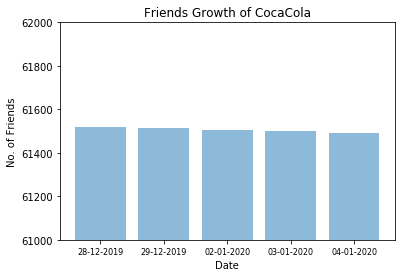

Audience Size of pepsi:
The audience size of pepsi on 28-12-2019 is 3056446.
The audience size of pepsi on 29-12-2019 is 3056135.
The audience size of pepsi on 02-01-2020 is 3055832.
The audience size of pepsi on 03-01-2020 is 3055792.
The audience size of pepsi on 04-01-2020 is 3055687.

Audience growth: -122.8


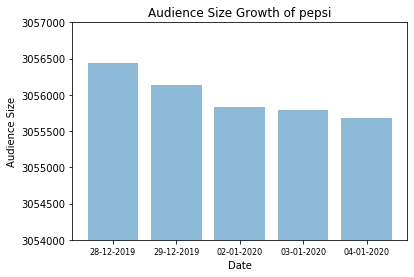

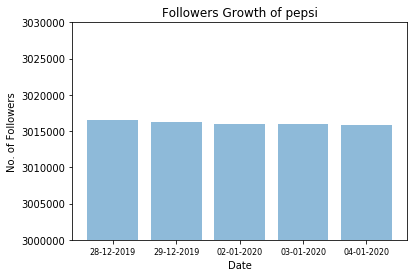

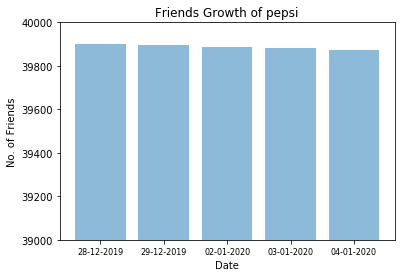

In [15]:
def audienceSizeGrowth(screen_name):
    date_range = ['28-12-2019', '29-12-2019', '02-01-2020', '03-01-2020', '04-01-2020']
    audience_size, followers, friends = [], [], []
    print("Audience Size of {}:" .format(screen_name))
    for date in date_range:
        followers_file = 'output/{}/user_profile_{}.json'.format(screen_name, date)
        with open(followers_file, mode='r', encoding='utf-8') as f:
            profile = json.load(f)
            print("The audience size of {} on {} is {}.".format(screen_name, date, profile['followers_count'] + profile['friends_count']))
            audience_size.append(profile['followers_count'] + profile['friends_count'])
            followers.append(profile['followers_count'])
            friends.append(profile['friends_count'])

    #calculate the average audience growth
    no_of_days = len(date_range)
    audience_growth = np.round(sum(np.diff(audience_size[0:3]))/no_of_days,2)
    print('\nAudience growth: {}'.format(audience_growth))

    # plotting barchart
    plt.bar(date_range, audience_size, align='center', alpha=0.5)
    # p1 = plt.bar(date_range, followers, width=0.4, color='b')
    # p2 = plt.bar(date_range, friends, width=0.4, color='r')
    plt.xticks(fontsize=8)
    plt.ylabel('Audience Size')
    if (screen_name == 'CocaCola'):
        plt.ylim(3400000, 3406000)
    else:
        plt.ylim(3054000, 3057000)
    plt.xlabel('Date')
    plt.title('Audience Size Growth of {}'.format(screen_name))
    plt.show()
    
    plt.bar(date_range, followers, align='center', alpha=0.5)
    plt.xticks(fontsize=8)
    plt.ylabel('No. of Followers')
    if (screen_name == 'CocaCola'):
        plt.ylim(3340000, 3344000)
    else:
        plt.ylim(3000000, 3030000)
    plt.xlabel('Date')
    plt.title('Followers Growth of {}'.format(screen_name))
    plt.show()
    
    plt.bar(date_range, friends, align='center', alpha=0.5)
    plt.xticks(fontsize=8)
    plt.ylabel('No. of Friends')
    if (screen_name == 'CocaCola'):
        plt.ylim(61000, 62000)
    else:
        plt.ylim(39000, 40000)
    plt.xlabel('Date')
    plt.title('Friends Growth of {}'.format(screen_name))
    plt.show()
    
    
audienceSizeGrowth(screen_name1)
audienceSizeGrowth(screen_name2)

Followers

No. of Followers of CocaCola:
The number of followers of CocaCola on 28-12-2019 is 3342626.
The number of followers of CocaCola on 29-12-2019 is 3342334.
The number of followers of CocaCola on 02-01-2020 is 3341869.
The number of followers of CocaCola on 03-01-2020 is 3341768.
The number of followers of CocaCola on 04-01-2020 is 3341575.
Followers growth: -210.2 



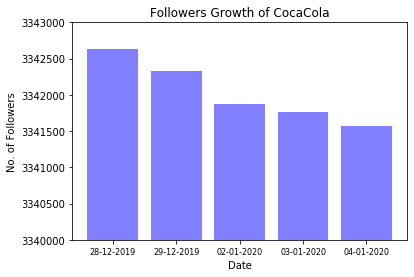

No. of Followers of pepsi:
The number of followers of pepsi on 28-12-2019 is 3016545.
The number of followers of pepsi on 29-12-2019 is 3016239.
The number of followers of pepsi on 02-01-2020 is 3015945.
The number of followers of pepsi on 03-01-2020 is 3015910.
The number of followers of pepsi on 04-01-2020 is 3015813.
Followers growth: -146.4 



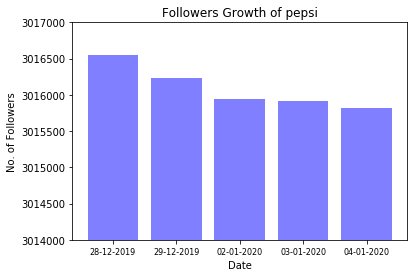

In [23]:
def followersGrowth(screen_name):
    date_range = ['28-12-2019', '29-12-2019', '02-01-2020', '03-01-2020', '04-01-2020']
    followers = []
    print("No. of Followers of {}:" .format(screen_name))
    for date in date_range:
        followers_file = 'output/{}/user_profile_{}.json'.format(screen_name, date)
        with open(followers_file, mode='r', encoding='utf-8') as f:
            profile = json.load(f)
            print("The number of followers of {} on {} is {}.".format(screen_name, date, profile['followers_count']))
            # audience_size.append(profile['followers_count'] + profile['friends_count'])
            followers.append(profile['followers_count'])
            # friends.append(profile['friends_count'])
            
    #calculate the average audience growth
    no_of_days = len(date_range)
    followers_growth = np.round(sum(np.diff(followers[0:no_of_days]))/no_of_days,2)
    print('Followers growth: {}'.format(followers_growth), "\n")
     

    plt.bar(date_range, followers, align='center', alpha=0.5, color='b')
    plt.xticks(fontsize=8)
    plt.ylabel('No. of Followers')
    if (screen_name == 'CocaCola'):
        plt.ylim(3340000, 3343000)
    else:
        plt.ylim(3014000, 3017000)
    plt.xlabel('Date')
    plt.title('Followers Growth of {}'.format(screen_name))
    plt.show()
    
    return followers
    
CocaCola_followersGrowth = followersGrowth(screen_name1)
Pepsi_followersGrowth = followersGrowth(screen_name2)

In [5]:
CocaCola_followersGrowth = [x / 1000000 for x in CocaCola_followersGrowth]
Pepsi_followersGrowth = [x / 1000000 for x in Pepsi_followersGrowth]

<Figure size 720x360 with 0 Axes>

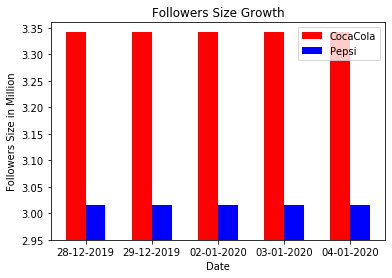

In [6]:
date_range = ['28-12-2019', '29-12-2019', '02-01-2020', '03-01-2020', '04-01-2020']

# Position of bars on x-axis
ind = np.arange(len(date_range))

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Followers Size Growth')
ax.bar(ind,CocaCola_followersGrowth,width,color='r',label='CocaCola')
ax.bar(ind+width,Pepsi_followersGrowth,width,color='b',label='Pepsi')
ax.set_xticks(ind+ width / 2)
ax.axes.set_xticklabels(date_range)
ax.set_xlabel('Date')
ax.set_ylabel('Followers Size in Million')
plt.ylim(2.95, 3.36)
plt.legend(loc='best')
plt.show()

No. of Friends of CocaCola:
The number of friends of CocaCola on 28-12-2019 is 61521.
The number of friends of CocaCola on 29-12-2019 is 61513.
The number of friends of CocaCola on 02-01-2020 is 61503.
The number of friends of CocaCola on 03-01-2020 is 61500.
The number of friends of CocaCola on 04-01-2020 is 61493.

Friends growth: -5.6


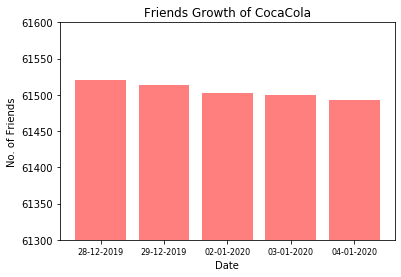

No. of Friends of pepsi:
The number of friends of pepsi on 28-12-2019 is 39901.
The number of friends of pepsi on 29-12-2019 is 39896.
The number of friends of pepsi on 02-01-2020 is 39887.
The number of friends of pepsi on 03-01-2020 is 39882.
The number of friends of pepsi on 04-01-2020 is 39874.

Friends growth: -5.4


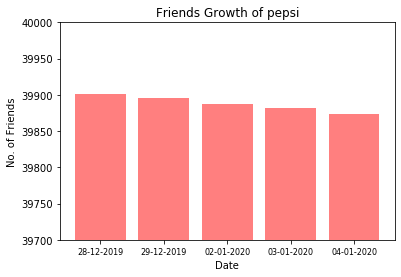

In [26]:
def friendsGrowth(screen_name):
    date_range = ['28-12-2019', '29-12-2019', '02-01-2020', '03-01-2020', '04-01-2020']
    friends = []
    print("No. of Friends of {}:" .format(screen_name))
    for date in date_range:
        followers_file = 'output/{}/user_profile_{}.json'.format(screen_name, date)
        with open(followers_file, mode='r', encoding='utf-8') as f:
            profile = json.load(f)
            print("The number of friends of {} on {} is {}.".format(screen_name, date, profile['friends_count']))
            # audience_size.append(profile['followers_count'] + profile['friends_count'])
            friends.append(profile['friends_count'])
            # friends.append(profile['friends_count'])
            
    #calculate the average audience growth
    no_of_days = len(date_range)
    friends_growth = np.round(sum(np.diff(friends[0:no_of_days]))/no_of_days,2)
    print('\nFriends growth: {}'.format(friends_growth))

    plt.bar(date_range, friends, align='center', alpha=0.5, color='r')
    plt.xticks(fontsize=8)
    plt.ylabel('No. of Friends')
    if (screen_name == 'CocaCola'):
        plt.ylim(61300, 61600)
    else:
        plt.ylim(39700, 40000)
    plt.xlabel('Date')
    plt.title('Friends Growth of {}'.format(screen_name))
    plt.show()
    
    return friends
    
CocaCola_friendsGrowth = friendsGrowth(screen_name1)
Pepsi_friendsGrowth = friendsGrowth(screen_name2)

In [8]:
CocaCola_friendsGrowth = [x / 1000 for x in CocaCola_friendsGrowth]
Pepsi_friendsGrowth = [x / 1000 for x in Pepsi_friendsGrowth]

<Figure size 1080x720 with 0 Axes>

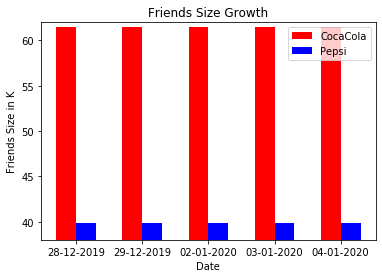

In [12]:
date_range = ['28-12-2019', '29-12-2019', '02-01-2020', '03-01-2020', '04-01-2020']

# Position of bars on x-axis
ind = np.arange(len(date_range))

# Figure size
plt.figure(figsize=(15,10))

# Width of a bar 
width = 0.3       

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Friends Size Growth')
ax.bar(ind,CocaCola_friendsGrowth,width,color='r',label='CocaCola')
ax.bar(ind+width,Pepsi_friendsGrowth,width,color='b',label='Pepsi')
ax.set_xticks(ind+ width / 2)
ax.axes.set_xticklabels(date_range)
ax.set_xlabel('Date')
ax.set_ylabel('Friends Size in K')
plt.ylim(38, 62)
plt.legend(loc='best')
plt.show()

# Degree of Centrality of Followers (30000 out of Total)

In [104]:
# Degree of centrality of each follower
def followers_degCentrality(screen_name):
    followers_file = 'output/{}/followers.json'.format(screen_name)
    centrality = []
    with open(followers_file) as f:
        for line in f:
            profile = json.loads(line)
            deg_centrality = profile['followers_count'] + profile['friends_count']
            centrality.append([profile['screen_name'], deg_centrality])
    
    print('The Top 5 Followers based on Degree of Centrality of {}:'.format(screen_name))
    for n in range(5):
        if n == 0:
            index, value = max(enumerate(item[1] for item in centrality), key=operator.itemgetter(1))
        else:
            centrality.pop(index)
            index, value = max(enumerate(item[1] for item in centrality), key=operator.itemgetter(1))
        print('\n', centrality[index][0])
        print('Degree of Centrality: {}'.format(value))

In [105]:
followers_degCentrality(screen_name1)

The Top 5 Followers based on Degree of Centrality of CocaCola:

 JDaIey
Degree of Centrality: 1681235

 greggrunberg
Degree of Centrality: 1291485

 NOH8Campaign
Degree of Centrality: 1119910

 DaveVescio
Degree of Centrality: 1116261

 monark
Degree of Centrality: 774842


In [106]:
followers_degCentrality(screen_name2)

The Top 5 Followers based on Degree of Centrality of pepsi:

 JLo
Degree of Centrality: 44253321

 DanielNewman
Degree of Centrality: 1615980

 JacksonWang852
Degree of Centrality: 1252729

 IamCvind
Degree of Centrality: 483123

 AmyMcGrathKY
Degree of Centrality: 346524


In [179]:
from plotly import graph_objs as go

def plot_followers_degCentrality(screen_name):
    followers_file = 'output/{}/followers.json'.format(screen_name)
    centrality = []
    with open(followers_file) as f:
        for line in f:
            profile = json.loads(line)
            deg_centrality = profile['followers_count'] + profile['friends_count']
            centrality.append([profile['screen_name'], deg_centrality])
            
    return centrality

CocaCola_followers_centrality = plot_followers_degCentrality(screen_name1)
pepsi_followers_centrality = plot_followers_degCentrality(screen_name2)

CocaCola_followers_centrality = [row[1] for row in CocaCola_followers_centrality]
pepsi_followers_centrality = [row[1] for row in pepsi_followers_centrality]

Text(0, 0.5, 'Density')

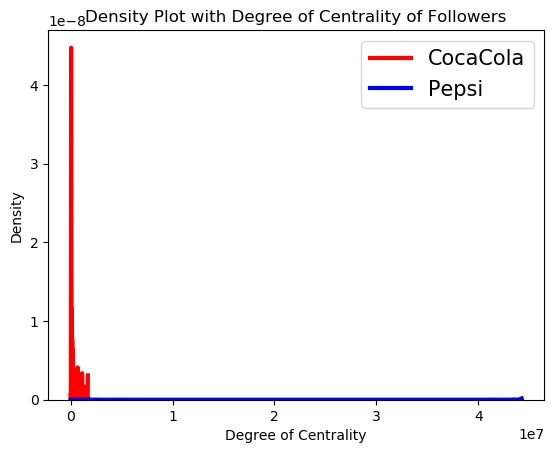

In [184]:
import seaborn as sns

names = ['CocaCola', 'Pepsi']
 
# Draw the density plot
sns.distplot(CocaCola_followers_centrality, hist = False, kde = True,
             kde_kws = {'linewidth': 3},
             label = 'CocaCola', color = 'r')

sns.distplot(pepsi_followers_centrality, hist = False, kde = True,
             kde_kws = {'linewidth': 3},
             label = 'Pepsi', color = 'b')
    
# Plot formatting
plt.legend(prop={'size': 15})
plt.title('Density Plot with Degree of Centrality of Followers')
plt.xlabel('Degree of Centrality')
plt.ylabel('Density')

In [109]:
from plotly import graph_objs as go

x3 = [row[1] for row in CocaCola_followers_centrality]
x4 = [row[1] for row in pepsi_followers_centrality]


fig2 = go.Figure()
# Use x instead of y argument for horizontal plot
fig2.add_trace(go.Box(x=x3, name='CocaCola', boxpoints='all'))
fig2.add_trace(go.Box(x=x4, name='Pepsi', boxpoints='all'))

fig2.layout.update(title_text="Plot of Degree of Centrality of Followers")
fig2.show()

# Degree of Centrality of Friends (15000 out of Total)

In [98]:
# Degree of centrality of each friend
def friends_degCentrality(screen_name):
    friends_file = 'output/{}/friends.json'.format(screen_name)
    centrality = []
    with open(friends_file) as f:
        for line in f:
            profile = json.loads(line)
            deg_centrality = profile['followers_count'] + profile['friends_count']
            centrality.append([profile['screen_name'], deg_centrality])
    
    print('The Top 5 Friends based on Degree of Centrality of {}:'.format(screen_name))
    for n in range(5):
        if n == 0:
            index, value = max(enumerate(item[1] for item in centrality), key=operator.itemgetter(1))
        else:
            centrality.pop(index)
            index, value = max(enumerate(item[1] for item in centrality), key=operator.itemgetter(1))
        print('\n', centrality[index][0])
        print('Degree of Centrality: {}'.format(value))

In [99]:
friends_degCentrality(screen_name1)

The Top 5 Friends based on Degree of Centrality of CocaCola:

 justinbieber
Degree of Centrality: 107787365

 rihanna
Degree of Centrality: 95053044

 taylorswift13
Degree of Centrality: 85568539

 TheEllenShow
Degree of Centrality: 79214298

 britneyspears
Degree of Centrality: 56604448


In [100]:
friends_degCentrality(screen_name2)

The Top 5 Friends based on Degree of Centrality of pepsi:

 BarackObama
Degree of Centrality: 111622907

 katyperry
Degree of Centrality: 108306814

 justinbieber
Degree of Centrality: 107787417

 ladygaga
Degree of Centrality: 80715024

 TheEllenShow
Degree of Centrality: 79214332


In [185]:
from plotly import graph_objs as go

def plot_friends_degCentrality(screen_name):
    friends_file = 'output/{}/friends.json'.format(screen_name)
    centrality = []
    with open(friends_file) as f:
        for line in f:
            profile = json.loads(line)
            deg_centrality = profile['followers_count'] + profile['friends_count']
            centrality.append([profile['screen_name'], deg_centrality])
            
    return centrality

CocaCola_friends_centrality = plot_friends_degCentrality(screen_name1)
pepsi_friends_centrality = plot_friends_degCentrality(screen_name2)

CocaCola_friends_centrality = [row[1] for row in CocaCola_friends_centrality]
pepsi_friends_centrality = [row[1] for row in pepsi_friends_centrality]

Text(0, 0.5, 'Density')

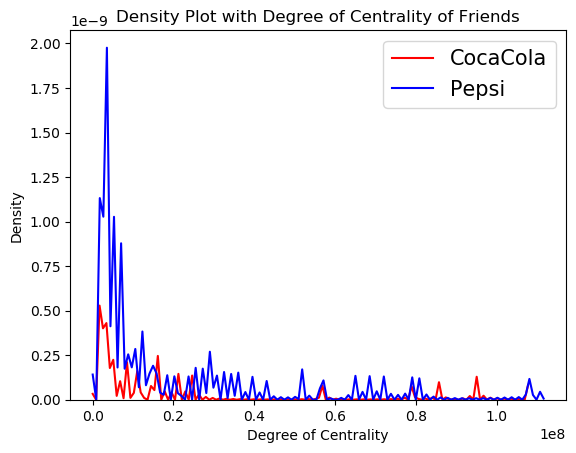

In [187]:
names = ['CocaCola', 'Pepsi']
 
# Draw the density plot
sns.distplot(CocaCola_friends_centrality, hist = False, kde = True,
             kde_kws = {'linewidth': 1.5},
             label = 'CocaCola', color = 'r')

sns.distplot(pepsi_friends_centrality, hist = False, kde = True,
             kde_kws = {'linewidth': 1.5},
             label = 'Pepsi', color = 'b')
    
# Plot formatting
plt.legend(prop={'size': 15})
plt.title('Density Plot with Degree of Centrality of Friends')
plt.xlabel('Degree of Centrality')
plt.ylabel('Density')

In [103]:
from plotly import graph_objs as go

x1 = [row[1] for row in CocaCola_centrality]
x2 = [row[1] for row in pepsi_centrality]


fig = go.Figure()
# Use x instead of y argument for horizontal plot
fig.add_trace(go.Box(x=x1, name='CocaCola', boxpoints='all'))
fig.add_trace(go.Box(x=x2, name='Pepsi', boxpoints='all'))

fig.layout.update(title_text="Plot of Degree of Centrality of Friends")
fig.show()

# Length of Tweet / No. of Words per Tweet

Function to remove url, emoji, @, RT

In [27]:
def remove_url(txt):
#     txt = txt.replace("RT ", "", 1)
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

New Tweet ONLY

In [28]:
def tweetLength(screen_name):
    tweets_file = 'output/{}/tweetsExtended.json'.format(screen_name)
    with open(tweets_file) as f:
        text, wordCount, favCount, rtwtCount = [], [], [], []
        for line in f:
            tweet = json.loads(line)
            if tweet['in_reply_to_status_id'] is None:
                if tweet['full_text'].startswith("RT @") == False:
                    clean_text = remove_url(tweet['full_text'])
                    count = len(clean_text.split())
                    text.append(clean_text)
                    wordCount.append(count)
                    favCount.append(tweet['favorite_count'])
                    rtwtCount.append(tweet['retweet_count'])
    return text, wordCount, favCount, rtwtCount
            
CocaCola_tweet, CocaCola_tweetLength, CocaCola_tweetFav, CocaCola_tweetRtwt = tweetLength(screen_name1)
Pepsi_tweet, Pepsi_tweetLength, Pepsi_tweetFav, Pepsi_tweetRtwt = tweetLength(screen_name2)

# print("E.g. ")
# print(CocaCola_tweet[0], " ", CocaCola_tweetLength[0], " ", CocaCola_tweetFav[0], " ", CocaCola_tweetRtwt[0])

Place the array into a dataFrame

In [198]:
df_CocaCola_tweetLength = pd.DataFrame({'word_count': CocaCola_tweetLength,
                               'fav_count': CocaCola_tweetFav,
                               'rtwt_count': CocaCola_tweetRtwt})
df_CocaCola_tweetLength['engagement'] = df_CocaCola_tweetLength['fav_count'] + df_CocaCola_tweetLength['rtwt_count']

In [199]:
df_Pepsi_tweetLength = pd.DataFrame({'word_count': Pepsi_tweetLength,
                               'fav_count': Pepsi_tweetFav,
                               'rtwt_count': Pepsi_tweetRtwt})
df_Pepsi_tweetLength['engagement'] = df_Pepsi_tweetLength['fav_count'] + df_Pepsi_tweetLength['rtwt_count']

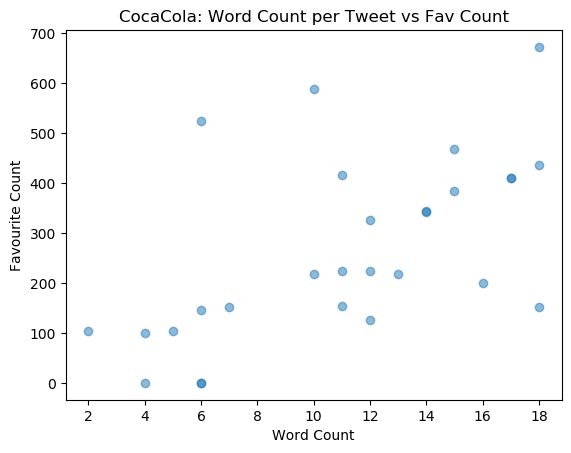

In [200]:
plt.scatter(df_CocaCola_tweetLength['word_count'], df_CocaCola_tweetLength['fav_count'], alpha=0.5)
plt.title('CocaCola: Word Count per Tweet vs Fav Count')
plt.xlabel('Word Count')
plt.ylabel('Favourite Count')
plt.show()

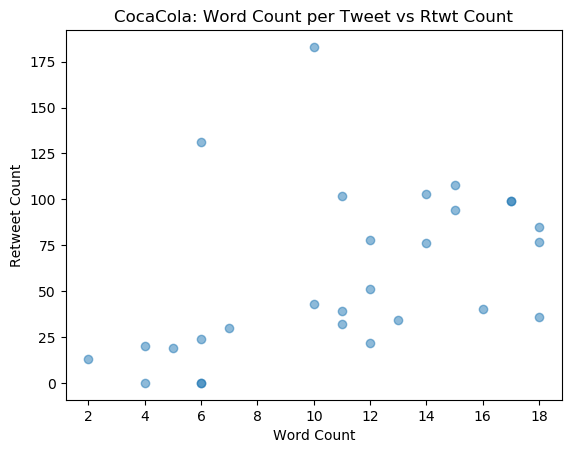

In [206]:
plt.scatter(df_CocaCola_tweetLength['word_count'], df_CocaCola_tweetLength['rtwt_count'], alpha=0.5)
plt.title('CocaCola: Word Count per Tweet vs Rtwt Count')
plt.xlabel('Word Count')
plt.ylabel('Retweet Count')
plt.show()

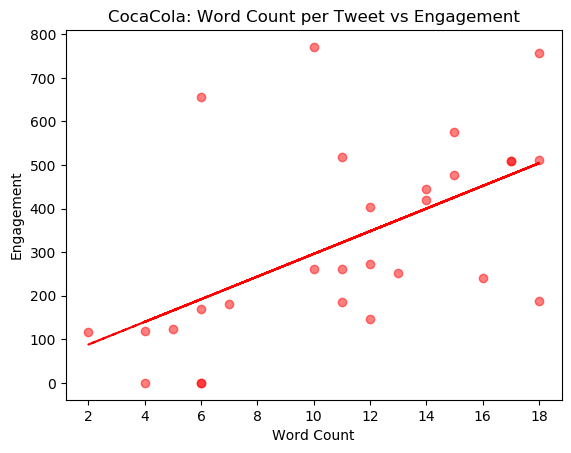

In [209]:
plt.scatter(df_CocaCola_tweetLength['word_count'], df_CocaCola_tweetLength['rtwt_count']+df_CocaCola_tweetLength['fav_count'], alpha=0.5, color='r')
plt.title('CocaCola: Word Count per Tweet vs Engagement')
plt.xlabel('Word Count')
plt.ylabel('Engagement')

# trend line
z = np.polyfit(df_CocaCola_tweetLength['word_count'], df_CocaCola_tweetLength['rtwt_count']+df_CocaCola_tweetLength['fav_count'], 1)
p = np.poly1d(z)
plt.plot(df_CocaCola_tweetLength['word_count'],p(df_CocaCola_tweetLength['word_count']),"r--")

plt.show()

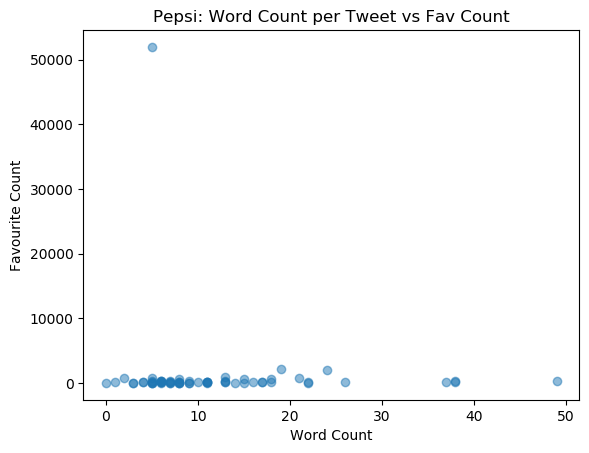

In [213]:
plt.scatter(df_Pepsi_tweetLength['word_count'], df_Pepsi_tweetLength['fav_count'], alpha=0.5)
plt.title('Pepsi: Word Count per Tweet vs Fav Count')
plt.xlabel('Word Count')
plt.ylabel('Favourite Count')
plt.show()

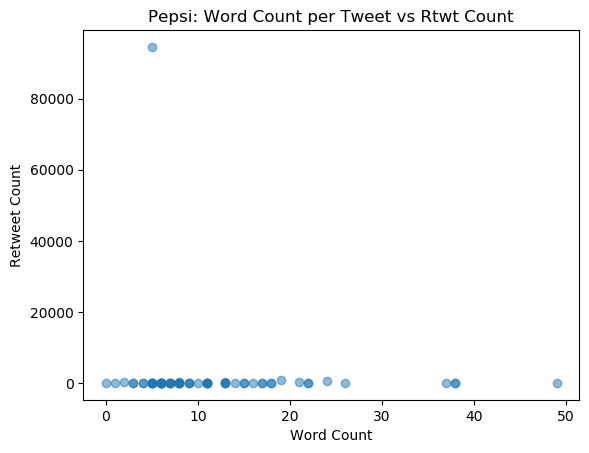

In [211]:
plt.scatter(df_Pepsi_tweetLength['word_count'], df_Pepsi_tweetLength['rtwt_count'], alpha=0.5)
plt.title('Pepsi: Word Count per Tweet vs Rtwt Count')
plt.xlabel('Word Count')
plt.ylabel('Retweet Count')
plt.show()

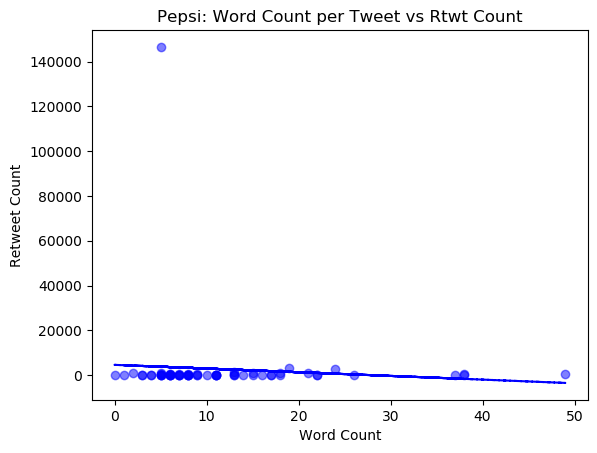

In [215]:
plt.scatter(df_Pepsi_tweetLength['word_count'], df_Pepsi_tweetLength['rtwt_count']+df_Pepsi_tweetLength['fav_count'], alpha=0.5, color='b')
plt.title('Pepsi: Word Count per Tweet vs Rtwt Count')
plt.xlabel('Word Count')
plt.ylabel('Retweet Count')

# trend line
z = np.polyfit(df_Pepsi_tweetLength['word_count'], df_Pepsi_tweetLength['rtwt_count']+df_Pepsi_tweetLength['fav_count'], 1)
p = np.poly1d(z)
plt.plot(df_Pepsi_tweetLength['word_count'],p(df_Pepsi_tweetLength['word_count']),"b--")

plt.show()

In [218]:
index, value = max(enumerate(df_Pepsi_tweetLength['rtwt_count']), key=operator.itemgetter(1))

In [219]:
Pepsi_tweet[index]

'RT if youre just tired'

In [220]:
df_Pepsi_tweetLength['rtwt_count'].pop(index)
df_Pepsi_tweetLength['word_count'].pop(index)
df_Pepsi_tweetLength['fav_count'].pop(index)

51952

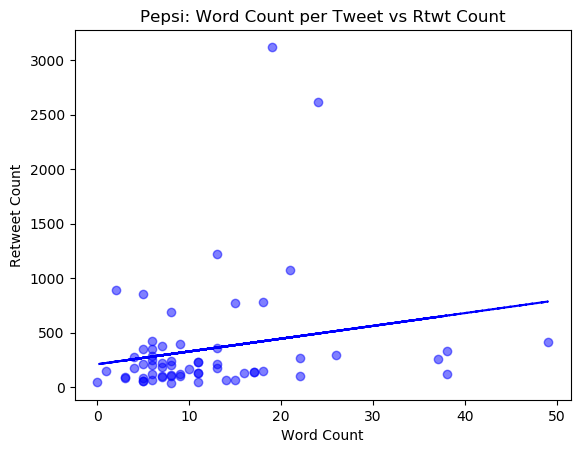

In [221]:
plt.scatter(df_Pepsi_tweetLength['word_count'], df_Pepsi_tweetLength['rtwt_count']+df_Pepsi_tweetLength['fav_count'], alpha=0.5, color='b')
plt.title('Pepsi: Word Count per Tweet vs Rtwt Count')
plt.xlabel('Word Count')
plt.ylabel('Retweet Count')

# trend line
z = np.polyfit(df_Pepsi_tweetLength['word_count'], df_Pepsi_tweetLength['rtwt_count']+df_Pepsi_tweetLength['fav_count'], 1)
p = np.poly1d(z)
plt.plot(df_Pepsi_tweetLength['word_count'],p(df_Pepsi_tweetLength['word_count']),"b--")

plt.show()

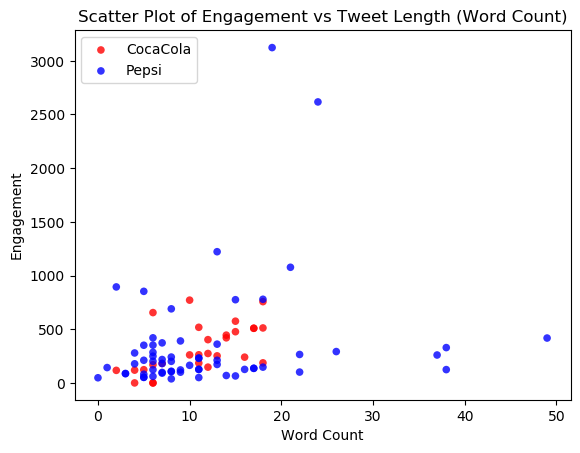

In [225]:
s1 = (df_CocaCola_tweetLength['word_count'], df_CocaCola_tweetLength['rtwt_count']+df_CocaCola_tweetLength['fav_count'])
s2 = (df_Pepsi_tweetLength['word_count'], df_Pepsi_tweetLength['rtwt_count']+df_Pepsi_tweetLength['fav_count'])

data = (s1, s2)
colors = ("red", "blue")
groups = ("CocaCola", "Pepsi")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Scatter Plot of Engagement vs Tweet Length (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Engagement')
plt.legend(loc=2)
plt.show()

# WordCloud

In [114]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string

def buildWordCloud(screen_name):
    tweets_file = 'output/{}/tweetsExtended.json'.format(screen_name)
    with open(tweets_file, mode='r', encoding='utf-8') as f1:
        text = []
        for line in f1:
            profile = json.loads(line)
            clean_txt = remove_url(profile['full_text'])
            text.append(clean_txt)
    
    tweet_tokenizer = TweetTokenizer()
    punct = list(string.punctuation)
    stopword_list = stopwords.words('english') + punct + ['rt', 'via', '..', '...', 'https']
    
    tweets = text[0]
    for i in range(len(text)):
        tweets += text[i]
    cloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1200, height=1000).generate(tweets)
    cloud.to_file('wordcload{}.png'.format(screen_name))
    
    plt.imshow(cloud)
    plt.axis("off")
    plt.show()

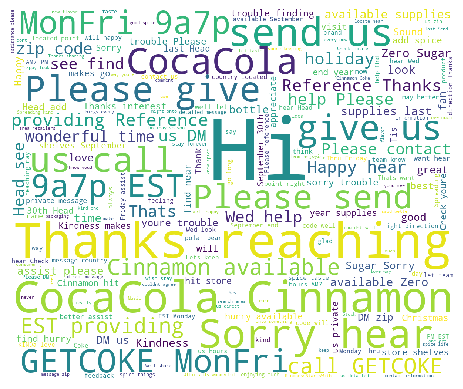

In [115]:
buildWordCloud(screen_name1)

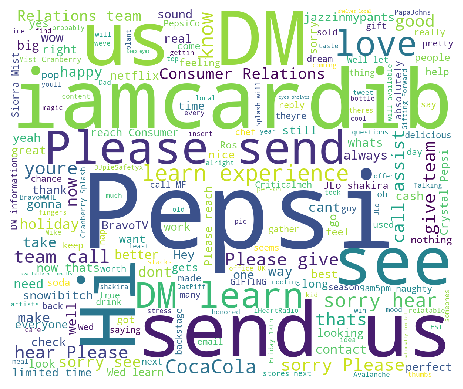

In [116]:
buildWordCloud(screen_name2)

# How often their Tweets contain their Product?